In [4]:
# importando as bibliotecas e classes
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics as m
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from math import abs

In [18]:
#importando os dados
data = pd.read_csv("dados_desmatamento.csv")
#dados.dropna()
# dados = pd.get_dummies(dados_brutos)

In [32]:
data.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [37]:
#Separa features(matriz X:colunas usadas para fazer a predição) de target (coluna y:coluna se quer prever)
target = "AMZ LEGAL"
X = data.drop([target], axis=1)
y = data[target]

In [133]:
#Gera dados de teste e de treino
#train_test_split: separar a base de treino e teste
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.5, random_state=0)
xTrain

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO
10,2014,309,500,31,257,1075,1887,684,219,50
7,2011,280,502,66,396,1120,3008,865,141,40
15,2019,688,1421,8,215,1685,3862,1245,617,21
11,2015,264,712,25,209,1601,2153,1030,156,57
3,2007,184,610,39,631,2678,5526,1611,309,63
0,2004,728,1232,46,755,11814,8870,3858,311,158
5,2009,167,405,70,828,1049,4281,482,121,61
12,2016,372,1129,17,258,1489,2992,1376,202,58


In [134]:
#Define classificador utilizado e treina
classifier = LinearRegression()
classifier.fit(xTrain, yTrain)

#Faz predicao com o modelo de teste
yPred = classifier.predict(xTest)

#Verificar a precisão do modelo
prediction_relative_error = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]
prediction_relative_error

[0.6073200253008847,
 0.1326774209346695,
 0.34089679806011236,
 0.28219226615036025,
 0.08965777178906342,
 1.472065295120009,
 0.048433272351739616,
 0.3583357268622574]

In [169]:
#Ordenar a base de testes por ano
xTestSorted = xTest.sort_values(by=["Ano/Estados"])["Ano/Estados"]
yTestSorted = [yTest[index] for index in xTestSorted.index]


#Proximos passos
'''
Plotar xTeste, yTeste e yPred. Com isto, será possível visualizar graficamente 
o quão distante do valor real está o resultado do modelo.

Observação: Para que o gráfico fique legível, é importante que os dados estejam ordenados
pelo ano. Isso foi feito para xTest e yTest, que agora são xTestSorted e yTestSorted.
Falta fazer para o yPred (yPredSorted)

Exemplo do plot:
plt.plot(xTestSorted, yTestSorted, xTestSorted, yPredSorted)
'''

[(19014, 18898.52417038929),
 (7000, 6990.712580534573),
 (4571, 4586.582392639328),
 (5891, 5874.376053601082),
 (6947, 6953.228525406186),
 (12911, 12720.941649747056),
 (14286, 14279.08082271183),
 (7536, 7563.00418037634)]

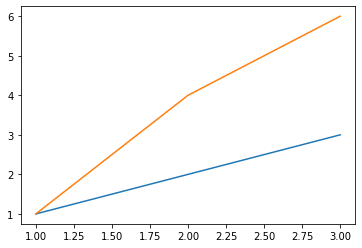

In [172]:
x = [1,2,3]
y1 = [1,2,3]
y2 = [1,4,6]

plt.plot(x, y1, x,y2)